# Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

In [ ]:
#Install enchant for language check
!pip install pyenchant

     |████████████████████████████████| 55 kB 3.1 MB/s 


In [ ]:
#Install complete package of enchant
!apt install -qq enchant

The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../0-libtext-iconv-perl_1.7-5build6_amd64.deb ...
Unpacking libtext-iconv-perl (1.7-5build6) ...
Selecting previously unselected package libaspe

In [ ]:
#Install easyocr for text recognisition
!pip3 install easyocr

     |████████████████████████████████| 63.6 MB 56 kB/s 
     |████████████████████████████████| 47.7 MB 1.6 MB/s 


In [ ]:
!pip install "opencv-python-headless<4.3"

     |████████████████████████████████| 21.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [ ]:
#Install spaCy open source library
!pip install -U spacy

#PIP install Language modules
#When you install please check version on spaCy models in following link and change the version only when you install
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.0.0/en_core_web_md-3.0.0.tar.gz
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.0.0/en_core_web_lg-3.0.0.tar.gz


     |████████████████████████████████| 6.0 MB 18.1 MB/s 
     |████████████████████████████████| 628 kB 47.6 MB/s 
     |████████████████████████████████| 451 kB 49.3 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 47.9 MB/s 
     |████████████████████████████████| 181 kB 49.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 13.7 

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-01-20 17:32:21--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.133.96
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.133.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  15.9MB/s    in 69s     

2022-01-20 17:33:30 (22.9 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!pip install gensim
!pip install scikit-learn

# Imports

In [ ]:
#Install nltk for english words and removing stop words.
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import cv2
import numpy as np
import pandas as pd
import PIL
from PIL import Image,ImageOps,ImageEnhance
from nltk.tokenize import sent_tokenize, word_tokenize
import easyocr
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,os.path
import random
import operator
import math
import enchant
from wordcloud import WordCloud, STOPWORDS
import imageio
import urllib.request
import pylab

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import en_core_web_sm
import en_core_web_md
import en_core_web_lg

In [ ]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
print('Imported Successfully!')

Imported Successfully!


# Text Recognition from Images

In [ ]:
#Code for Text Recognition from Images

#solve function takes a list of words(words) and words_dic(dictionary that will stores the words) and it written a list that contains corrected words.

def solve(words,words_dic):
  l1 = len(words)
  k = 0
  ans = []
  #Used enchant of en_US to check language of words.
  du = enchant.Dict("en_US")
  while(k < l1):
      #Replace | with I as | will never be in a text and will be most probabaly I.
      words[k] = words[k].replace('|','I')
      #Replace all symbols by empty space as there is no need of symbol.
      words[k] = re.sub('[^a-zA-Z0-9 \n\.]', '',words[k])
      if(len(words[k]) > 0 and du.check(words[k]) == False):
        if(len(words[k]) > 0):
          #I saw in many words there is unnecessary l,i,I coming at end and so, if we replace them, then it can form a meaningful word.
          if(words[k][-1] == 'l' or words[k][-1] == 'i' or words[k][-1] == 'I'):
            if(len(words[k]) > 1 and du.check(words[k][:-1]) == True):
              words[k] = words[k][:-1]
          s1 = words[k].lower()
          s2 = words[k].upper()
          #If word is not a number then there can't be 0 in the word and so, replaced 0 by o which is most likely.
          if(s1 != s2):
            words[k] = words[k].replace('0','o')
            if(du.check(words[k]) == False):
              #I saw that 'Il' and 'II' was coming instead of 'll' and so, replaced them by 'll' which is most likely.
              words[k].replace('Il','ll')
              words[k].replace('II','ll')
              #There is merging of words like Iknow and aman and so, checked whether such is a case and update words accordingly.
              if((words[k][0] == 'I' or words[k][1] == 'i') and len(words[k]) > 1 and du.check(words[k][1:]) == True):
                ans.append('I')
                words_dic[words[k][0]] = 1
                words[k] = words[k][1:]
              elif((words[k][0] == 'a' or words[k][0] == 'A') and len(words[k]) > 1 and du.check(words[k][1:]) == True):
                ans.append('a')
                words_dic[words[k][0]] = 1
                words[k] = words[k][1:]
          ans.append(words[k])
          words_dic[words[k]] = 1
      else:
        #words can't be empty and so, checked that.
        if(words[k] != '.' and words[k] != '?' and words[k] != '' and words[k] != ' '):
          words_dic[words[k]] = 1
          ans.append(words[k])
      k = k+1
  return ans

#imgs stores images link.
imgs = []
#Path to image folder.
path = "/content/drive/MyDrive/Memes_2"
#Valid format of images.
valid_images = [".jpg",".png",".jpeg"]
#Getting all images in the path of folder.
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(os.path.join(path,f))

#Generating Random List to check the images.
randomlist = []
for i in range(0,10):
  n = random.randint(0,2135)
  randomlist.append(n)

nu = 0
lq = len(imgs)
print(lq)
#total_dict will stores all the words present in all the images with there frequency.
total_dict = {}
#using easyocr to read text.
reader = easyocr.Reader(['en'])
#meme_dict stores the words present in images in form of a sentence separated by space for each image.
meme_dict = {}
while(nu < lq):
  try:
    img = cv2.imread(imgs[nu], cv2.IMREAD_COLOR)
    imgf = img
    stop_words = set(stopwords.words('english'))

    #ans contains sentences present in the images.
    ans = []
    #words_dic contains all the words present in the image.
    words_dic = {}

    #Plot the images, uncomment these following 2 lines to see the images.
    #imgplot = plt.imshow(imgf)
    #plt.show()

    #Getting text from images using easyocr. text will be in form of list and it's length will denote number of sentences present in the images.
    text = reader.readtext(imgf,paragraph="False")
    #print(text)

    l = len(text)
    i = 0
    while(i < l):
      if(len(text[i][-1]) == 0):
        i = i+1
        continue
      ans.append(text[i][-1])
      #Getting portion of image that contains sentence text[i][-1]
      left = text[i][0][0][0]
      top = text[i][0][0][1]
      right = text[i][0][1][0]
      bottom = text[i][0][3][1]
      #cropping the portion of image that contains that text.
      imgf = img[top:bottom,left:right]

      #Tokenizing sentences into words.
      wds = word_tokenize(text[i][-1])
      tu = len(wds)
    
      width,height = imgf.shape[1],imgf.shape[0]
      img7 = np.array(imgf,dtype=np.uint8)

      #Converting Cropped image into Gray Scale.
      gray = cv2.cvtColor(img7,cv2.COLOR_BGR2GRAY)
    
      #imgplot = plt.imshow(gray)
      #plt.show()
      #print("First Part Done")
  
      #Used openCV to enhanced the image for better text reading.
      ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
      rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(width/tu),int(height/tu)))
      dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
      contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
      im2 = img7.copy()

      for cnt in contours:
        #Getting the rectangles that contains words of text.
        x,y,w,h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2,(x,y),(x+w,y+h),(0,255,0),2)
        #Cropping that region
        cropped = im2[y:y+h,x:x+w]
        img4 = np.array(cropped)

        #imgplot = plt.imshow(img4)
        #plt.show()

        #Reading word from that cropped image. Word will be read more accurately as image contains only that word.
        tex = reader.readtext(img4,paragraph="False")

        if(len(tex) > 0):
          s = tex[0][-1]
          words = word_tokenize(s)
          words = [w for w in words if not w.lower() in stop_words]
          solve(words,words_dic)
      i = i+1
  
    #Getting words stored in images as form of list.
    words = list(words_dic.keys())
    l = len(ans)
    text = ""
    i = 0
    while(i < l):
      s = ans[i]
      if(s[-1] != '.' and s[-1] != '?' and s[-1] != ':'):
        s = s+'.'
      s = s+' '
      text = text+s
      i = i+1

    #print(text)
    #print(words)

    #Storing words in total_dict
    st = ''
    l = len(words)
    i = 0
    while(i < l):
      if not words[i].lower() in stop_words:
        words[i] = words[i].upper()
        st = st+words[i]+' '
        if words[i] in total_dict.keys():
            total_dict[words[i]] += 1
        else:
            total_dict[words[i]] = 1
      i = i+1
    meme_dict[imgs[nu]] = st
  except Exception as e:
    print(e)
    meme_dict[imgs[nu]] = ' '
  nu = nu+1
  if(nu%10 == 0):
    print(nu)

#Saving text of each image in csv file.
arr = list(meme_dict.keys())
arr_text = []
for w in arr:
  arr_text.append(meme_dict[w])
arrn = list(zip(arr,arr_text))
df = pd.DataFrame(arrn,columns=['Image Link','Text'])
df.to_csv('/content/drive/MyDrive/Memes_2.csv',index=None)

#Sorting total_dict to get words that are used most frequently.
total_dict = dict(sorted(total_dict.items(),key=operator.itemgetter(1),reverse=True))
print(total_dict)
print(list(total_dict.keys()))

ImportError: ignored

# Word Cloud

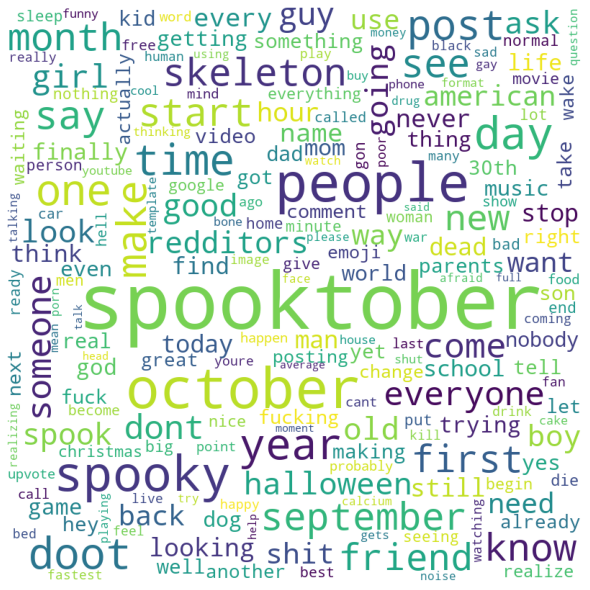

In [ ]:
# Python program to generate WordCloud

df = pd.read_csv('/content/drive/MyDrive/Memes_1.csv')

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Text:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    if(tokens[i] == 'meme' or tokens[i] == 'reddit' or tokens[i] == 'mematic' or tokens[i] == 'redditor' or tokens[i] == 'made' or tokens[i] == 'memes' or tokens[i] == 'nt' or tokens[i] == 'nan' or len(tokens[i]) <= 2):
      tokens[i] = ''
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10,collocations=False).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('/content/drive/MyDrive/Memes_1.png')
plt.show()


# Classification of memes based on positioning of text

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


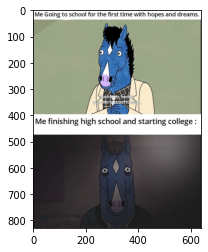

[[[[4, 3], [632, 3], [632, 34], [4, 34]], 'Me Going to school for the first time with hopes and dreams'], [[[262, 320], [381, 320], [381, 359], [262, 359]], 'uckietp budul lite aboutito'], [[[8, 399], [618, 399], [618, 450], [8, 450]], 'Me finishing high school and starting college']]


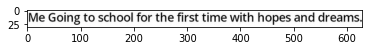

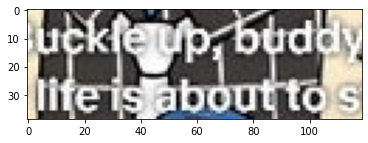

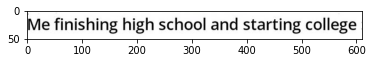

Class that image belongs to is : 2 (Text on Image and not on Image)


In [ ]:
#Code for image classification on the basis of text background.

reader = easyocr.Reader(['en'])
path = "/content/drive/MyDrive/Memes_2/img1010.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)

#Plot the images, uncomment these following 2 lines to see the images.
imgplot = plt.imshow(img)
plt.show()
#Getting text from images using easyocr. text will be in form of list and it's length will denote number of sentences present in the images.
text = reader.readtext(img,paragraph="False")
print(text)

l = len(text)
i = 0
ans = 0
co = 0
ant = "(Text not on Image)"
while(i < l):
  if(len(text[i][-1]) == 0):
    i = i+1
    continue
  #Getting portion of image that contains sentence text[i][-1]
  left = text[i][0][0][0]
  top = text[i][0][0][1]
  right = text[i][0][1][0]
  bottom = text[i][0][3][1]
  #cropping the portion of image that contains that text.
  imgf = img[top:bottom,left:right]

  imgplot = plt.imshow(imgf)
  plt.show()
  
  img1 = imgf[:,:,0]
  img2 = imgf[:,:,1]
  img3 = imgf[:,:,2]
  
  img1 = img1.flatten()
  img2 = img2.flatten()
  img3 = img3.flatten()

  std1 = np.std(img1,axis=0)
  std2 = np.std(img2,axis=0)
  std3 = np.std(img3,axis=0)

  mi = std1
  ma = std1
  if(std2 < mi):
    mi = std2
  if(std3 < mi):
    mi = std3
  if(std2 > ma):
    std2 = ma
  if(std3 > ma):
    std3 = ma
  
  if(ma-mi > 1):
    co = co+1
  i = i+1

if(co == l):
  ans = 1
  ant = "(Text on Image)"
elif(co > 0):
  ans = 2
  ant = "(Text on Image and not on Image)"
print("Class that image belongs to is :",ans,ant)

# Meme Search

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)

v_apple = word_vectors['banana']
v_mango = word_vectors['mango']
cosine_similarity([v_apple],[v_mango])

array([[0.63652116]], dtype=float32)

In [ ]:
word = "mematic"
if word in word_vectors.vocab:
  print("Hi")

Enter Word/Sentences to search memes : Covid


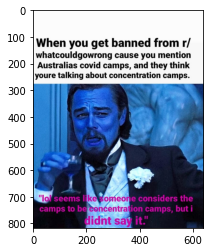

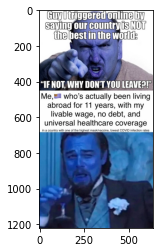

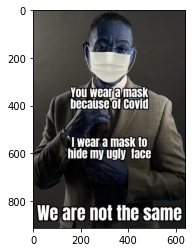

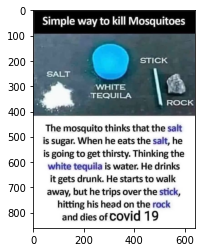

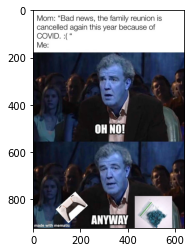

In [ ]:
def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1],reverse=True) 
    return tup

def checksimilarity(word1,word2):
  l1 = len(word1)
  l2 = len(word2)
  if(l1 == 0 or l2 == 0):
    return 0.0
  i = 0
  ans = 0
  while(i < l2):
    if(word1[0] == word2[i]):
      j = 0
      k = i
      while(j < l1 and k < l2 and word1[j] == word2[k]):
        j = j+1
        k = k+1
      if(j > ans):
        ans = j
    i = i+1
  i = 0
  while(i < l2):
    if(word1[l1-1] == word2[i]):
      j = l1-1
      k = i
      sp = 0
      while(j >= 0 and k >= 0 and word1[j] == word2[k]):
        j = j-1
        k = k-1
        sp = sp+1
      if(sp > ans):
        ans = sp
    i = i+1
  ans = (ans*ans)/(l1*l2)
  return ans


df1 = pd.read_csv('/content/drive/MyDrive/Memes_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Memes_2.csv')

df = pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)

dic_engwords = {}
dic_nonengwords = {}

n = df.shape[0]
i = 0
while(i < n):
  s = df.iloc[i][1]
  s = str(s)
  arr = word_tokenize(s)
  l = len(arr)
  j = 0
  while(j < l):
    word = arr[j]
    if word in word_vectors.vocab:
       if word in dic_engwords.keys():
         dic_engwords[word].append(df.iloc[i][0])
       else:
         lp = []
         lp.append(df.iloc[i][0])
         dic_engwords[word] = lp
    else:
       if word in dic_nonengwords.keys():
         dic_nonengwords[word].append(df.iloc[i][0])
       else:
         lp = []
         lp.append(df.iloc[i][0])
         dic_nonengwords[word] = lp
    j = j+1
  i = i+1

s = input("Enter Word/Sentences to search memes : ")
arrs = word_tokenize(s)
n = len(arrs)
i = 0
arr_engwords = list(dic_engwords.keys())
l = len(arr_engwords)
arr_t_engwords = {}
while(i < l):
  x = arr_engwords[i]
  kl = dic_engwords[x]
  j = 0
  while(j < len(kl)):
    arr_t_engwords[kl[j]] = 0.0
    j = j+1
  i = i+1

i = 0
arr_nonengwords = list(dic_nonengwords.keys())
l = len(arr_nonengwords)
while(i < l):
  x = arr_nonengwords[i]
  kl = dic_nonengwords[x]
  j = 0
  while(j < len(kl)):
    arr_t_engwords[kl[j]] = 0.0
    j = j+1
  i = i+1

i = 0
while(i < n):
  l = len(arr_engwords)
  arrs[i] = arrs[i].upper()
  if arrs[i] in word_vectors.vocab:
    j = 0
    ran = []
    while(j < l):
      x1 = word_vectors[arrs[i]]
      x2 = word_vectors[arr_engwords[j]]
      num = cosine_similarity([x1],[x2])
      x = (arr_engwords[j],num)
      ran.append(x)
      j = j+1
    ran = Sort_Tuple(ran)
    j = 0
    while(j < l):
      k = 0
      kl = dic_engwords[ran[j][0]]
      while(k < len(kl)):
        arr_t_engwords[kl[k]] += 1/(j+1)
        k = k+1
      j = j+1
  else:
    l = len(arr_nonengwords)
    j = 0
    ran = []
    while(j < l):
      x1 = arrs[i]
      x2 = arr_nonengwords[j]
      num = checksimilarity(x1,x2)
      x = (arr_nonengwords[j],num)
      ran.append(x)
      j = j+1
    ran = Sort_Tuple(ran)
    j = 0
    while(j < l):
      k = 0
      kl = dic_nonengwords[ran[j][0]]
      while(k < len(kl)):
        arr_t_engwords[kl[k]] += 1/(j+1)
        k = k+1
      j = j+1
  i = i+1

arr_t_engwords = dict( sorted(arr_t_engwords.items(), key=operator.itemgetter(1),reverse=True))

ans = list(arr_t_engwords.keys())

i = 0
while(i < 5):
  img = cv2.imread(ans[i], cv2.IMREAD_COLOR)
  scale_percent = 100 # percent of original size
  width = int(img.shape[1]*scale_percent/100)
  height = int(img.shape[0]*scale_percent/100)
  dim = (width, height)
  
  # resize image
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
  imgplot = plt.imshow(img)
  #plt.rcParams['figure.figsize'] = [20,20]
  plt.show()
  i = i+1

# GIF Reader

In [ ]:
def solve(words,words_dic):
  l1 = len(words)
  k = 0
  ans = []
  #Used enchant of en_US to check language of words.
  du = enchant.Dict("en_US")
  while(k < l1):
      #Replace | with I as | will never be in a text and will be most probabaly I.
      words[k] = words[k].replace('|','I')
      #Replace all symbols by empty space as there is no need of symbol.
      words[k] = re.sub('[^a-zA-Z0-9 \n\.]', '',words[k])
      if(len(words[k]) > 0 and du.check(words[k]) == False):
        if(len(words[k]) > 0):
          #I saw in many words there is unnecessary l,i,I coming at end and so, if we replace them, then it can form a meaningful word.
          if(words[k][-1] == 'l' or words[k][-1] == 'i' or words[k][-1] == 'I'):
            if(len(words[k]) > 1 and du.check(words[k][:-1]) == True):
              words[k] = words[k][:-1]
          s1 = words[k].lower()
          s2 = words[k].upper()
          #If word is not a number then there can't be 0 in the word and so, replaced 0 by o which is most likely.
          if(s1 != s2):
            words[k] = words[k].replace('0','o')
            if(du.check(words[k]) == False):
              #I saw that 'Il' and 'II' was coming instead of 'll' and so, replaced them by 'll' which is most likely.
              words[k].replace('Il','ll')
              words[k].replace('II','ll')
              #There is merging of words like Iknow and aman and so, checked whether such is a case and update words accordingly.
              if((words[k][0] == 'I' or words[k][1] == 'i') and len(words[k]) > 1 and du.check(words[k][1:]) == True):
                ans.append('I')
                words_dic[words[k][0]] = 1
                words[k] = words[k][1:]
              elif((words[k][0] == 'a' or words[k][0] == 'A') and len(words[k]) > 1 and du.check(words[k][1:]) == True):
                ans.append('a')
                words_dic[words[k][0]] = 1
                words[k] = words[k][1:]
          ans.append(words[k])
          words_dic[words[k]] = 1
      else:
        #words can't be empty and so, checked that.
        if(words[k] != '.' and words[k] != '?' and words[k] != '' and words[k] != ' '):
          words_dic[words[k]] = 1
          ans.append(words[k])
      k = k+1
  return ans

In [ ]:
def get_text_from_image(img,total_dict,meme_dict,reader,loca):
    imgf = img
    stop_words = set(stopwords.words('english'))

    #ans contains sentences present in the images.
    ans = []
    #words_dic contains all the words present in the image.
    words_dic = {}

    #Plot the images, uncomment these following 2 lines to see the images.
    #imgplot = plt.imshow(imgf)
    #plt.show()

    #Getting text from images using easyocr. text will be in form of list and it's length will denote number of sentences present in the images.
    text = reader.readtext(imgf,paragraph="False")
    #print(text)

    l = len(text)
    i = 0
    while(i < l):
      if(len(text[i][-1]) == 0):
        i = i+1
        continue
      ans.append(text[i][-1])
      #Getting portion of image that contains sentence text[i][-1]
      left = text[i][0][0][0]
      top = text[i][0][0][1]
      right = text[i][0][1][0]
      bottom = text[i][0][3][1]
      #cropping the portion of image that contains that text.
      imgf = img[top:bottom,left:right]

      #Tokenizing sentences into words.
      wds = word_tokenize(text[i][-1])
      tu = len(wds)
    
      width,height = imgf.shape[1],imgf.shape[0]
      img7 = np.array(imgf,dtype=np.uint8)

      #Converting Cropped image into Gray Scale.
      gray = cv2.cvtColor(img7,cv2.COLOR_BGR2GRAY)
    
      #imgplot = plt.imshow(gray)
      #plt.show()
      #print("First Part Done")
  
      #Used openCV to enhanced the image for better text reading.
      ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
      rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(width/tu),int(height/tu)))
      dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
      contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
      im2 = img7.copy()

      for cnt in contours:
        #Getting the rectangles that contains words of text.
        x,y,w,h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2,(x,y),(x+w,y+h),(0,255,0),2)
        #Cropping that region
        cropped = im2[y:y+h,x:x+w]
        img4 = np.array(cropped)

        #imgplot = plt.imshow(img4)
        #plt.show()

        #Reading word from that cropped image. Word will be read more accurately as image contains only that word.
        tex = reader.readtext(img4,paragraph="False")

        if(len(tex) > 0):
          s = tex[0][-1]
          words = word_tokenize(s)
          words = [w for w in words if not w.lower() in stop_words]
          solve(words,words_dic)
      i = i+1
  
    #Getting words stored in images as form of list.
    words = list(words_dic.keys())
    l = len(ans)
    text = ""
    i = 0
    while(i < l):
      s = ans[i]
      if(s[-1] != '.' and s[-1] != '?' and s[-1] != ':'):
        s = s+'.'
      s = s+' '
      text = text+s
      i = i+1

    #print(text)
    #print(words)

    #Storing words in total_dict
    st = ''
    l = len(words)
    i = 0
    while(i < l):
      if not words[i].lower() in stop_words:
        words[i] = words[i].upper()
        st = st+words[i]+' '
        if words[i] in total_dict.keys():
            total_dict[words[i]] += 1
        else:
            total_dict[words[i]] = 1
      i = i+1
    meme_dict[loca] = st

In [ ]:
loca = '/content/drive/MyDrive/GIF/gif1.mp4'
vidcap = cv2.VideoCapture(loca)
success,image = vidcap.read()
count = 0
total_dict = {}
reader = easyocr.Reader(['en'])
meme_dict = {}
is_true = True
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  if(success == False):
    break
  get_text_from_image(image,total_dict,meme_dict,reader,loca)
  if(is_true):
    count += 10
  else:
    success = False
print(total_dict)
du = enchant.Dict("en_US")
words = list(total_dict.keys())
check_dic = {}
ans = ''
for w in words:
  if(du.check(w) == True):
    if(w not in check_dic.keys() and len(w) > 2):
      check_dic[w] = 1
      ans = ans+w
      ans = ans+' '
meme_dict[loca] = ans
print(meme_dict)

{'DAD': 45, 'SEES': 45, 'SORT': 45, 'PRICE': 45, 'LOW': 45, 'HIGH': 45}
{'/content/drive/MyDrive/GIF/gif1.mp4': 'DAD SEES SORT PRICE LOW HIGH '}


# Sentimental Analysis

In [ ]:
#Naive_Bayes function is for Classifying memes using Naive Bayes where nb_matrix is the naive bayes matrix, tot_classes stores the probability
#of each class, n_classesstores the class names and x denotes the meme text for testing where x[i] = 1 if word[i] is present in the meme text  
#and x[i] = 0 if it not present in the meme text.

def Naive_Bayes(nb_matrix,tot_classes,n_classes,x):
  r = nb_matrix.shape[0]
  c = nb_matrix.shape[1]
  i = 0
  ans = -1
  ma = -1
  while(i < r):
    j = 0
    p = 1
    while(j < c):
      #x[j] = 0 means word[j] is not in meme text and so, multiplying p by 1-Pr(x[j]=1 | Cl = i) i.e. Pr(x[j] = 0 | Cl = i)
      #x[j] = 1 means word[j] is in the meme text and so, multiplying p by Pr(x[j]=1 | Cl = i)
      if(x[j] == 0):
        p = p*(1-nb_matrix[i][j])
      else:
        p = p*nb_matrix[i][j]
      j = j+1
    if(p > ma):
      ma = p
      ans = n_classes[i]
    i = i+1
  return ans

In [ ]:
#solve function is for classifying memes whose text is stored in X and words is the word list.

def solve(X,words,nb_matrix,tot_classes,n_classes):
  #n is the number of test memes.
  n = X.shape[0]
  #c is length of word list created from training data.
  c = len(words)
  #Ypred stores the predicted value of test memes.
  Ypred = np.zeros(n)
  i = 0
  while(i < n):
    s = str(X[i])
    #Tokenize senetences into words and store it in form of list (wds).
    wds = word_tokenize(s)
    j = 0
    #x denotes the meme text with x[i] = 1 if word[i] is in meme text and x[i] = 0 otherwise.
    x = np.zeros(c)
    while(j < c):
      if(words[j] in wds):
        x[j] = 1
      j = j+1
    #Naive_Bayes function return the predicted value.
    Ypred[i] = Naive_Bayes(nb_matrix,tot_classes,n_classes,x)
    i = i+1
  return Ypred

In [ ]:
#create_NB_Matrix creates Naive Bayes matrix say it is A, then we have A[i][j] = Pr(word[j] = 1 | Class = i). 
#It returns word list as well which stores the words present in trainig set X and tot_classes stores the probability of each class (Pr(Cl = i)) 
def create_NB_Matrix(X,Y):
  n = X.shape[0]
  dic = {}
  i = 0
  while(i < n):
    s = str(X[i])
    wds = word_tokenize(s)
    l = len(wds)
    j = 0
    d = {}
    while(j < l):
      if((wds[j] == 'MADE') or (wds[j] == 'MEMATIC') or (wds[j] == 'COM') or (wds[j] == 'MEMES') or (wds[j] == 'MEME') or (len(wds[j]) <= 2)):
        j = j+1
        continue
      d[wds[j]] = 1
      j = j+1
    lis = list(d.keys())
    l = len(lis)
    j = 0
    while(j < l):
      if(lis[j] not in dic.keys()):
        dic[lis[j]] = 1
      else:
        dic[lis[j]] += 1
      j = j+1
    i = i+1

  #words is the list that stores the words present in the training set X.
  words = list(dic.keys())
  #Include word = UNKOWN_FOR_NB for meme text that doesn't contain any words present in the training set.
  words.append('UNKNOWN_FOR_NB')
  n_classes = np.unique(Y)
  r = len(n_classes)
  c = len(words)
  nb_matrix = np.zeros((r,c))
  tot_classes = np.zeros(r)
  i = 0
  while(i < r):
    y1 = Y[Y[:] == n_classes[i]]
    x1 = X[Y[:] == n_classes[i]]
    tot_classes[i] = x1.shape[0]
    n = x1.shape[0]
    j = 0
    while(j < n):
      s = str(x1[j])
      wds = word_tokenize(s)
      bo = False
      k = 0
      while(k < c-1):
        if(words[k] in wds):
          bo = True
          nb_matrix[i][k] += 1
        k = k+1
      if(bo == False):
        nb_matrix[i][c-1] += 1
      j = j+1
    i = i+1
  nb_matrix = nb_matrix/tot_classes[:,None]
  #Adding very small number to nb_matrix as when it has 0 value then if we multiply p in Naive_Bayes function, answer doesn't becomes 0.
  nb_matrix = nb_matrix+math.pow(10,-10)
  tot_classes = tot_classes/X.shape[0]

  return words,nb_matrix,tot_classes

In [ ]:
file_name = '/content/drive/MyDrive/m1.xlsx'
df1 = pd.read_excel(file_name)
file_name = '/content/drive/MyDrive/m2.xlsx'
df2 = pd.read_excel(file_name)
file_name = '/content/drive/MyDrive/m3.xlsx'
df3 = pd.read_excel(file_name)

df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df = df[(df['category'] != -1) & (df['category'] != 4)]
df.reset_index(drop=True,inplace=True)

#Removing memes that doesn't have text.
df = df.dropna()
df.reset_index(inplace=True,drop=True)

#Shuffling the data set.
df = df.sample(frac=1)
df.reset_index(drop=True,inplace=True)

X = df['meme_text'].values
Y = df['category'].values
print("Total Number of Samples : ",X.shape[0])
n_classes = np.unique(Y)

words,nb_matrix,tot_classes = create_NB_Matrix(X,Y)

#Uncomment these 3 lines to read word list of training set and it's naive bayes matrix and tot_classes.
#print("Word List : ",words)
#print("Naive Bayes Matrix : ",nb_matrix)
#print("Probabaility of Classes : ",tot_classes)

Ypred = solve(X,words,nb_matrix,tot_classes,n_classes)
acc = np.sum(np.where(Ypred == Y,1,0))/Y.shape[0]
print("Training Accuracy : ",acc)

k = 0
kacc = 0
r = int(X.shape[0]/10)
while(k < 10):
  Xtest = X[k*r:(k+1)*r]
  Ytest = Y[k*r:(k+1)*r]
  Xtra1 = X[0:k*r]
  Ytra1 = Y[0:k*r]
  Xtra2 = X[(k+1)*r:]
  Ytra2 = Y[(k+1)*r:]
  Xtrain = np.concatenate((Xtra1,Xtra2),axis=0)
  Ytrain = np.concatenate((Ytra1,Ytra2),axis=0)
  n_classes = np.unique(Ytrain)

  print("Shape :",Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)
  words,nb_matrix,tot_classes = create_NB_Matrix(Xtrain,Ytrain)
  
  Ypred = solve(Xtest,words,nb_matrix,tot_classes,n_classes)
  acc = np.sum(np.where(Ypred == Ytest,1,0))/Ytest.shape[0]
  print("Cross Validation Accuracy for Test : "+str(k)+" is :",acc)
  kacc += acc
  k += 1

kacc = kacc/10
print("10-Fold Cross Validation Accuracy is : ",kacc)

Total Number of Samples :  1983
Training Accuracy :  0.9455370650529501
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 0 is : 0.40404040404040403
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 1 is : 0.45454545454545453
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 2 is : 0.5
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 3 is : 0.41414141414141414
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 4 is : 0.43434343434343436
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 5 is : 0.4292929292929293
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 6 is : 0.4393939393939394
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 7 is : 0.40404040404040403
Shape : (1785,) (1785,) (198,) (198,)
Cross Validation Accuracy for Test : 8 is : 0.4494949494949495
Shape : (1785,) (1785,) (198,